# Analyze SVC runs

## Import modules

In [24]:
# import modules
import openml
from openml import tasks, flows, runs
import sklearn
from sklearn import feature_selection
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
import pprint
from collections import OrderedDict, Counter
import re
import numpy as np
import sys
import openmlcontrib
import matplotlib.pyplot as plt
from itertools import combinations
from utils.functions_analyze_runs import get_run_info_svc

# enable hgb
enable_hist_gradient_boosting

# set api key
openml.config.apikey = open('.key', 'r').readline().strip('\n')

## Get OpenML runs for SVC flows

In [3]:
# get all supervised classification tasks 
tasks_all = openml.tasks.list_tasks(task_type_id=1, output_format='dataframe', tag = 'OpenML-CC18')

In [124]:
openml.runs.get_run(10434301).flow_id

16374

In [14]:
# create dict
my_runs = openml.runs.list_runs(uploader = [8323], flow=[16345, 16374])

In [67]:
# create list with run ids
my_runs_ids = []
for i in my_runs.items():
    if i[1]['upload_time'] > '2019-11-16 22:50:39':
        my_runs_ids.append(i[1]['run_id'])

In [68]:
len(my_runs_ids)

12652

In [69]:
# relevant parameters
param_names = ['C',
              'coef0',
              'degree',
              'gamma',
              'kernel',
              'max_iter',
              'random_state',
              'probability']


# evaluation metrics
eval_names = ['area_under_roc_curve',
              'average_cost',
              'f_measure',
              'kappa', 
              'kb_relative_information_score', 
              'mean_absolute_error', 
              'mean_prior_absolute_error',
              'weighted_recall', 
              'number_of_instances', 
              'precision', 
              'predictive_accuracy', 
              'prior_entropy', 
              'relative_absolute_error', 
              'root_mean_prior_squared_error', 
              'root_mean_squared_error', 
              'root_relative_squared_error', 
              'total_cost', 
              'unweighted_recall']

# empty data frame 
df_params = pd.DataFrame(columns=['task_id', 'run_id']+param_names+eval_names)

# loop over runs
for i in my_runs_ids:
    print('.', '', end = '')
    
    model_params = get_run_info_svc(i).values()
    model_params_series = pd.Series(list(model_params), index=param_names)
    
    # get evaluation metrics from run
    run = openml.runs.get_run(i)
    run_evals = run.evaluations.values()
    if len(run_evals) < 18: # this needs to be fixed
        run_evals = [np.nan]*18
    run_evals_series = pd.Series(list(run_evals), index=eval_names)
    
    run_id = run.run_id
    task_id = run.task_id
    ids = pd.Series([task_id, run_id], index=['task_id', 'run_id'])
    
    # append row to data frame
    row = pd.concat([ids, model_params_series, run_evals_series])
    df_params = df_params.append(row, ignore_index = True)
    
# order data frame by auc and reset index
df_params = df_params.sort_values('area_under_roc_curve', ascending=False)
df_params = df_params.reset_index(drop = True)  


# convert variables to numeric
df_params = df_params.apply(pd.to_numeric, errors = 'ignore')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [70]:
df_params.head()

,task_id,run_id,C,coef0,degree,gamma,kernel,max_iter,random_state,probability,...,number_of_instances,precision,predictive_accuracy,prior_entropy,relative_absolute_error,root_mean_prior_squared_error,root_mean_squared_error,root_relative_squared_error,total_cost,unweighted_recall
0,10093,10433021,9366.200749,0.0,3,0.001558,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.012573,0.496922,0.027022,0.054379,0.0,1.0
1,10093,10424125,4.307036,0.0,3,0.099083,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.005969,0.496922,0.013141,0.026446,0.0,1.0
2,10093,10424024,0.758996,0.0,3,5.643789,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.003238,0.496922,0.010434,0.020998,0.0,1.0
3,10093,10424203,190.672976,0.0,3,0.388388,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.004803,0.496922,0.006139,0.012355,0.0,1.0
4,10093,10424095,140.215727,0.0,3,0.051838,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.008302,0.496922,0.015726,0.031646,0.0,1.0


In [121]:
df_params.gamma

0        0.001558
1        0.099083
2        5.643789
3        0.388388
4        0.051838
           ...   
12647    0.018550
12648    0.012406
12649    0.159408
12650    0.668011
12651    0.668011
Name: gamma, Length: 12652, dtype: float64

### Count runs per task

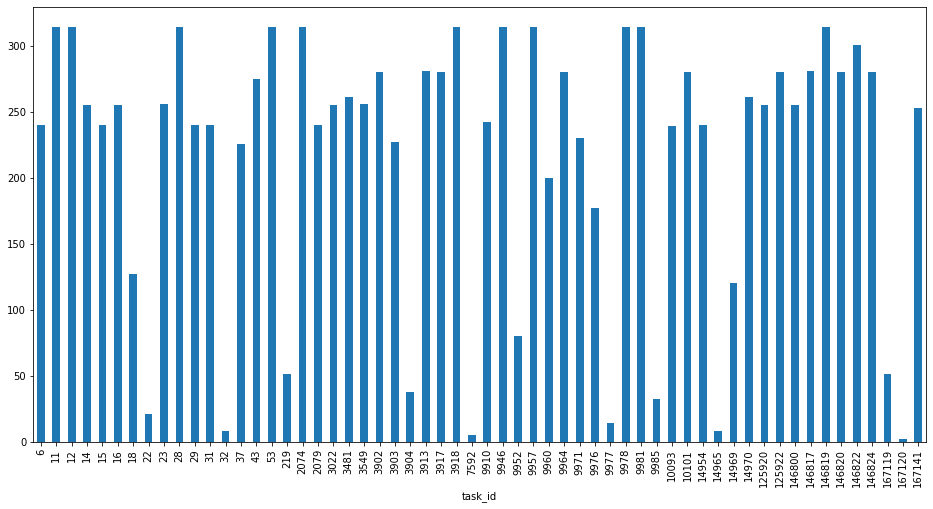

In [71]:
df_params.groupby('task_id').task_id.count().plot(kind = 'bar', figsize = (16,8));

In [120]:
len(df_params.task_id.unique())

58

### Task difficulties

In [72]:
df_params

,task_id,run_id,C,coef0,degree,gamma,kernel,max_iter,random_state,probability,...,number_of_instances,precision,predictive_accuracy,prior_entropy,relative_absolute_error,root_mean_prior_squared_error,root_mean_squared_error,root_relative_squared_error,total_cost,unweighted_recall
0,10093,10433021,9366.200749,0.000000,3,0.001558,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.012573,0.496922,0.027022,0.054379,0.0,1.0
1,10093,10424125,4.307036,0.000000,3,0.099083,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.005969,0.496922,0.013141,0.026446,0.0,1.0
2,10093,10424024,0.758996,0.000000,3,5.643789,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.003238,0.496922,0.010434,0.020998,0.0,1.0
3,10093,10424203,190.672976,0.000000,3,0.388388,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.004803,0.496922,0.006139,0.012355,0.0,1.0
4,10093,10424095,140.215727,0.000000,3,0.051838,rbf,-1,1,True,...,1372.0,1.0,1.0,0.991128,0.008302,0.496922,0.015726,0.031646,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12647,9971,10433704,877.923920,0.531069,1,0.018550,poly,-1,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12648,9971,10433705,1.082721,0.000000,3,0.012406,rbf,-1,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12649,9971,10433709,99.826528,-0.614535,1,0.159408,poly,-1,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12650,9971,10433790,2891.405888,-0.151241,3,0.668011,poly,-1,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


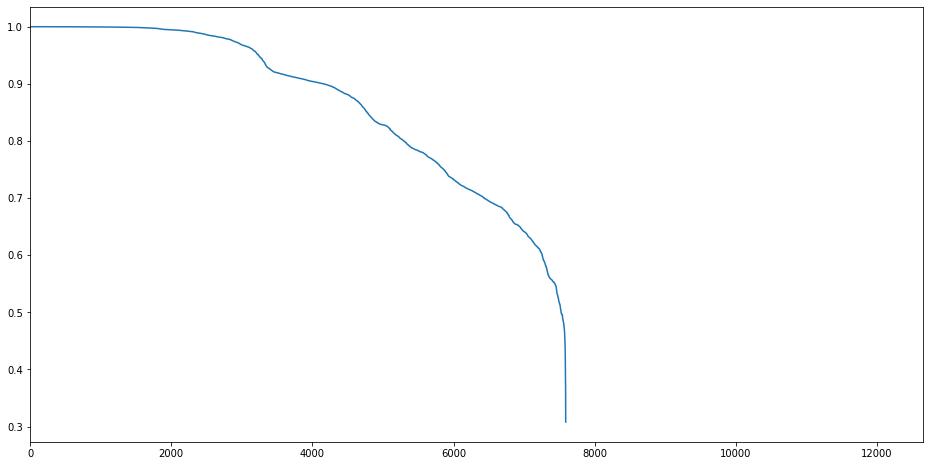

In [74]:
df_params.area_under_roc_curve.plot(figsize = (16,8));

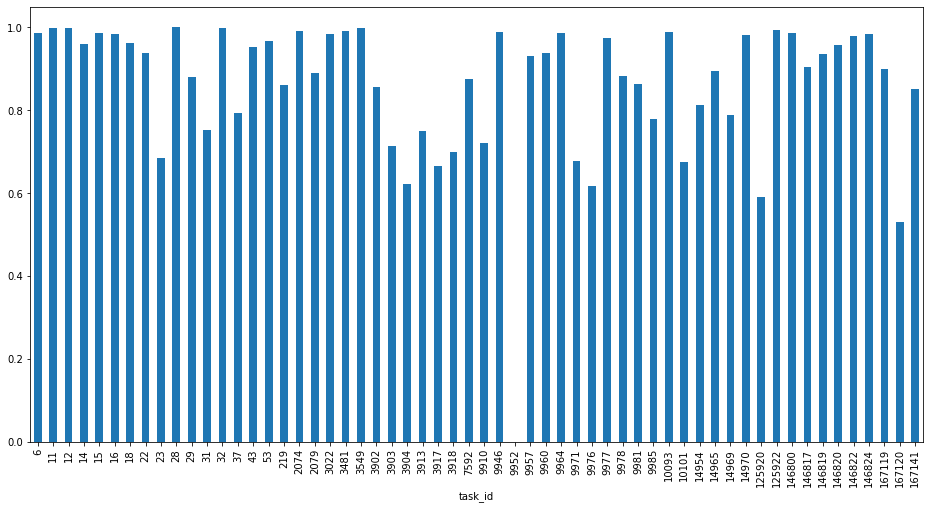

In [75]:
df_params.groupby('task_id')['area_under_roc_curve'].mean().plot(kind = 'bar', figsize = (16,8));

### Check hyperparameters

In [81]:
df_params.iloc[:,2:10]

,C,coef0,degree,gamma,kernel,max_iter,random_state,probability
0,9366.200749,0.000000,3,0.001558,rbf,-1,1,True
1,4.307036,0.000000,3,0.099083,rbf,-1,1,True
2,0.758996,0.000000,3,5.643789,rbf,-1,1,True
3,190.672976,0.000000,3,0.388388,rbf,-1,1,True
4,140.215727,0.000000,3,0.051838,rbf,-1,1,True
...,...,...,...,...,...,...,...,...
12647,877.923920,0.531069,1,0.018550,poly,-1,1,True
12648,1.082721,0.000000,3,0.012406,rbf,-1,1,True
12649,99.826528,-0.614535,1,0.159408,poly,-1,1,True
12650,2891.405888,-0.151241,3,0.668011,poly,-1,1,True


### Check distributions of relevant hyperparameters

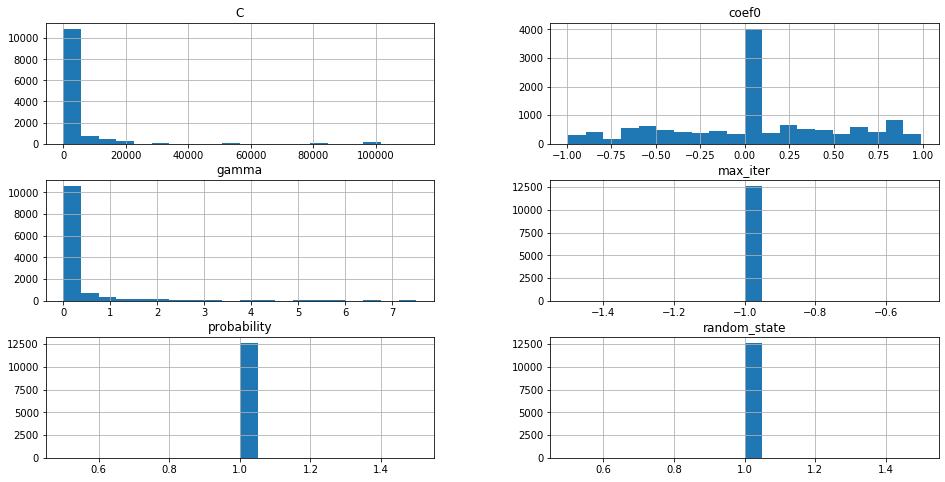

In [83]:
df_params.iloc[:,[2,3,5,6,7,8,9]].hist(figsize = (16,8), bins = 20);

## Use log scale 

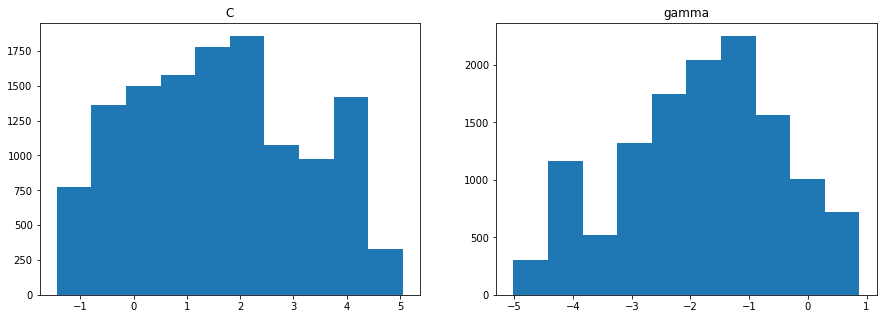

In [94]:
fig = plt.figure(figsize=(15, 5))
count = 1
for  i in ['C', 'gamma']:
    ax = fig.add_subplot(1,2,count)

    ax.hist(np.log10(df_params[i]).replace([np.inf, -np.inf], np.nan))


    ax.set_title(i)
    count += 1
    

In [107]:
df_params.kernel.value_counts()

rbf        9194
poly       2898
sigmoid     560
Name: kernel, dtype: int64

In [110]:
df_params.gamma

0        0.001558
1        0.099083
2        5.643789
3        0.388388
4        0.051838
           ...   
12647    0.018550
12648    0.012406
12649    0.159408
12650    0.668011
12651    0.668011
Name: gamma, Length: 12652, dtype: float64

### Check hyperparameter distributions of top ranked runs

In [95]:
# rank within tasks according to auc
df_params['rank'] = df_params.groupby('task_id')['area_under_roc_curve'].rank('dense', ascending=False)

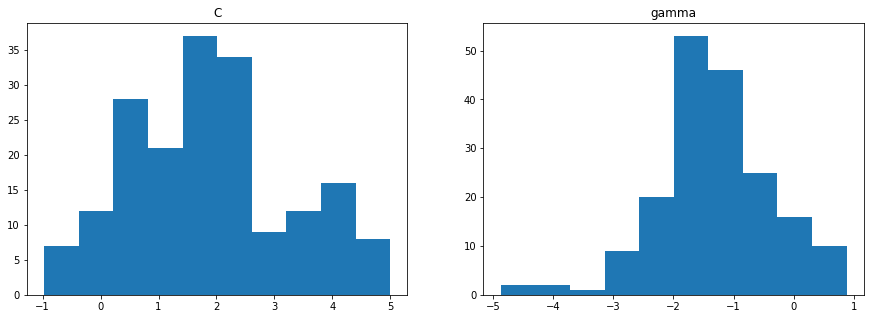

In [97]:
fig = plt.figure(figsize=(15, 5))
count = 1
for  i in ['C', 'gamma']:
    ax = fig.add_subplot(1,2,count)

    ax.hist(np.log10(df_params[df_params['rank'] == 1][i]).replace([np.inf, -np.inf], np.nan))


    ax.set_title(i)
    count += 1
    

### Rank runs over different tasks

In [103]:
group_cols = list(df_params.columns[[2,4,5,6]])
#group_cols = list(df_params.columns[[2,3,5,6]])
group_cols

['C', 'degree', 'gamma', 'kernel']

In [104]:
test = df_params.groupby(group_cols).agg({'rank':['count', 'mean']})
test

rank            
                                      count        mean
C             degree gamma    kernel                   
0.035984      3      5.555948 rbf        19  178.842105
0.038924      3      0.001556 rbf         0         NaN
0.039975      3      0.011043 rbf        31  122.774194
0.045545      3      0.136660 rbf        13  121.692308
0.046275      3      0.000111 sigmoid    12  152.416667
...                                     ...         ...
100000.000000 3      0.001942 rbf        34   83.823529
                     0.002411 rbf        33   80.636364
                     0.100000 rbf        30  118.066667
104658.369080 2      0.003717 rbf         0         NaN
112998.238792 2      1.096237 rbf         0         NaN

[314 rows x 2 columns]